In [1]:
!pip install fastai==2.0.16

In [2]:
!pip install -Uqq fastbook

In [3]:
# !conda install fastbook

In [4]:
import fastbook
fastbook.setup_book()

/home/ubuntu/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
path = Path('/home/ubuntu/car_make_model_train/')

In [7]:
path.ls()

(#14) [Path('/home/ubuntu/car_make_model_train/test_file.csv'),Path('/home/ubuntu/car_make_model_train/__pycache__'),Path('/home/ubuntu/car_make_model_train/config.py'),Path('/home/ubuntu/car_make_model_train/dataset.py'),Path('/home/ubuntu/car_make_model_train/input2'),Path('/home/ubuntu/car_make_model_train/train_file.csv'),Path('/home/ubuntu/car_make_model_train/mean_devstd_trial.txt'),Path('/home/ubuntu/car_make_model_train/main.py'),Path('/home/ubuntu/car_make_model_train/.ipynb_checkpoints'),Path('/home/ubuntu/car_make_model_train/results')...]

In [30]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)

In [31]:
data=ImageDataLoaders.from_folder(path, train="input", item_tfms=Resize(128), batch_tfms=tfms, bs = 64, num_workers = 8)

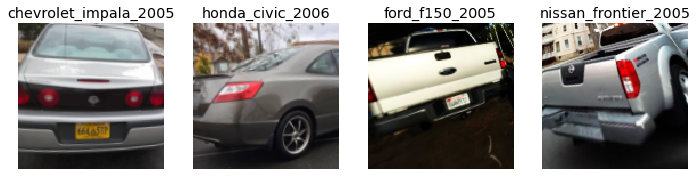

In [34]:
data.train.show_batch(max_n=4, nrows=1)

In [24]:
# data.classes

In [35]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,7.473431,None,None,06:43


/home/ubuntu/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,6.119934,None,None,07:08
1,5.424817,None,None,07:07
2,4.961656,None,None,07:08
3,4.680564,None,None,07:08


In [36]:
learn.export()

In [37]:
path.ls(file_exts='.pkl')

(#1) [Path('/home/ubuntu/car_make_model_train/export.pkl')]

In [38]:
learn_inf = load_learner(path/'export.pkl')


In [ ]:
learn_inf.predict('/home/ubuntu/car_make_model_train/input/')

In [37]:
from scipy.io import loadmat
import pandas as pd

In [38]:
!ls

__pycache__		     input2		    results
app.py			     main.py		    test_file.csv
car_make_model_fastai.ipynb  mean_devstd.txt	    train_file.csv
config.py		     mean_devstd_trial.txt
dataset.py		     requirements.txt


In [39]:
mat_train = loadmat('./input2/cars_annos.mat')

In [40]:
annotations = mat_train['annotations']
annotations = np.transpose(annotations)


In [41]:
annotations.shape

(16185, 1)

In [42]:
annotations 

array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8))],
       [(array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))],
       [(array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))],
       ...,
       [(array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8))],
       [(array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), arra

In [43]:
# Please change the array positions for different stuff accordingly 
fnames = []
class_ids = []
bboxes = []
labels = []

for annotation in annotations:
    bbox_x1 = annotation[0][0][0][0]
    bbox_y1 = annotation[0][1][0][0]
    bbox_x2 = annotation[0][2][0][0]
    bbox_y2 = annotation[0][3][0][0]
    class_id = annotation[0][5][0][0]
    labels.append('%04d' % (class_id,))
    fname = annotation[0][0][0]
    bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
    class_ids.append(class_id)
    fnames.append(fname)

In [44]:
fnames

['car_ims/000001.jpg',
 'car_ims/000002.jpg',
 'car_ims/000003.jpg',
 'car_ims/000004.jpg',
 'car_ims/000005.jpg',
 'car_ims/000006.jpg',
 'car_ims/000007.jpg',
 'car_ims/000008.jpg',
 'car_ims/000009.jpg',
 'car_ims/000010.jpg',
 'car_ims/000011.jpg',
 'car_ims/000012.jpg',
 'car_ims/000013.jpg',
 'car_ims/000014.jpg',
 'car_ims/000015.jpg',
 'car_ims/000016.jpg',
 'car_ims/000017.jpg',
 'car_ims/000018.jpg',
 'car_ims/000019.jpg',
 'car_ims/000020.jpg',
 'car_ims/000021.jpg',
 'car_ims/000022.jpg',
 'car_ims/000023.jpg',
 'car_ims/000024.jpg',
 'car_ims/000025.jpg',
 'car_ims/000026.jpg',
 'car_ims/000027.jpg',
 'car_ims/000028.jpg',
 'car_ims/000029.jpg',
 'car_ims/000030.jpg',
 'car_ims/000031.jpg',
 'car_ims/000032.jpg',
 'car_ims/000033.jpg',
 'car_ims/000034.jpg',
 'car_ims/000035.jpg',
 'car_ims/000036.jpg',
 'car_ims/000037.jpg',
 'car_ims/000038.jpg',
 'car_ims/000039.jpg',
 'car_ims/000040.jpg',
 'car_ims/000041.jpg',
 'car_ims/000042.jpg',
 'car_ims/000043.jpg',
 'car_ims/0

In [45]:
class_ids

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [46]:
fnames = [i.lstrip('car_ims/') for i in fnames]

In [47]:
fnames

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [48]:
df = pd.DataFrame({'fnames': fnames, 'class_ids': class_ids})


In [49]:
df

,fnames,class_ids
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,1
3,000004.jpg,1
4,000005.jpg,1
...,...,...
16180,016181.jpg,196
16181,016182.jpg,196
16182,016183.jpg,196
16183,016184.jpg,196


In [50]:
path = Path('/home/ubuntu/car_make_model_train/input2/car_ims')

In [51]:
path.ls()

(#16190) [Path('/home/ubuntu/car_make_model_train/input2/car_ims/012760.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/002098.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/000858.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/009077.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/011102.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/004036.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/014879.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/011723.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/010752.jpg'),Path('/home/ubuntu/car_make_model_train/input2/car_ims/014174.jpg')...]

In [52]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)

In [53]:
data=ImageDataLoaders.from_df(df, path, valid_pct=0.2, fn_col=0, label_col=1, item_tfms=Resize(128), batch_tfms=tfms, bs = 64, num_workers = 8)

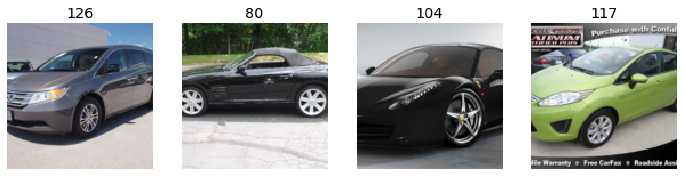

In [30]:
data.valid.show_batch(max_n=4, nrows=1)

In [31]:
learn = cnn_learner(data, resnet152, metrics=error_rate)

SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=5.754399353463668e-06)

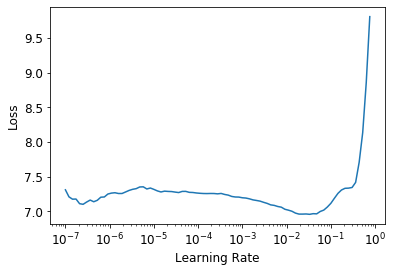

In [32]:
learn.lr_find()

In [33]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,5.456339,3.892056,0.834724,00:55
1,3.949777,2.797332,0.671610,00:55
2,3.313062,2.569454,0.620945,00:56


In [34]:
learn.unfreeze()

SuggestedLRs(lr_min=1.4454397387453355e-06, lr_steep=9.12010818865383e-07)

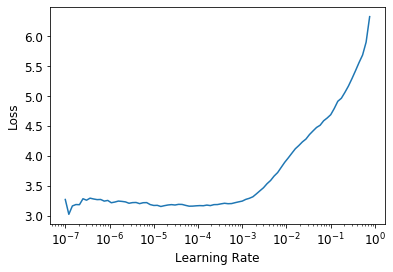

In [35]:
learn.lr_find()

In [36]:
learn.fit_one_cycle(50, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.174905,2.552655,0.618474,01:10
1,3.130714,2.516633,0.610442,01:10
2,3.128374,2.465446,0.596231,01:10
3,3.039752,2.384532,0.586345,01:09
4,2.914667,2.294178,0.563485,01:10
5,2.833044,2.187838,0.545876,01:10
6,2.722334,2.073586,0.521162,01:10
7,2.548322,1.921306,0.489342,01:09
8,2.393063,1.798016,0.464937,01:10
9,2.235616,1.681034,0.444856,01:09


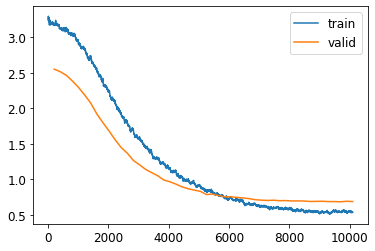

In [37]:
learn.recorder.plot_loss()

In [58]:
learn.export('model.pkl')

In [59]:
!ls -l

total 15324
drwxrwxr-x    2 ubuntu ubuntu     4096 Oct 13 21:21 __pycache__
-rw-rw-r--    1 ubuntu ubuntu   500031 Oct 14 13:49 car_make_model_fastai.ipynb
-rw-rw-r--    1 ubuntu ubuntu      293 Oct 13 21:21 config.py
-rw-rw-r--    1 ubuntu ubuntu     5092 Oct 13 18:57 dataset.py
drwxrwxr-x 9172 ubuntu ubuntu   393216 Oct 13 18:40 input
drwxrwxr-x    7 ubuntu ubuntu     4096 Oct 14 13:47 input2
-rw-rw-r--    1 ubuntu ubuntu     9610 Oct 13 21:51 main.py
-rw-rw-r--    1 ubuntu ubuntu       84 Oct 13 21:27 mean_devstd.txt
-rw-rw-r--    1 ubuntu ubuntu      101 Oct 13 21:27 mean_devstd_trial.txt
-rw-rw-r--    1 ubuntu ubuntu       83 Oct 13 17:18 requirements.txt
drwxrwxr-x    3 ubuntu ubuntu     4096 Oct 13 21:03 results
-rw-rw-r--    1 ubuntu ubuntu  4258123 Oct 13 19:00 test_file.csv
-rw-rw-r--    1 ubuntu ubuntu 10477878 Oct 13 19:00 train_file.csv


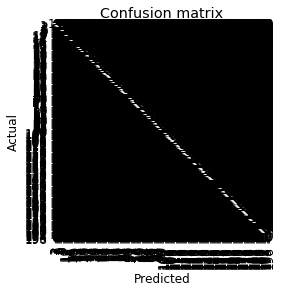

In [61]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [62]:
interp.most_confused(min_val=2)


[(104, 103, 8),
 (54, 74, 7),
 (148, 149, 7),
 (42, 43, 6),
 (43, 44, 6),
 (119, 71, 6),
 (18, 17, 5),
 (76, 95, 5),
 (83, 84, 5),
 (12, 21, 4),
 (22, 13, 4),
 (24, 20, 4),
 (31, 36, 4),
 (36, 31, 4),
 (64, 119, 4),
 (74, 54, 4),
 (84, 83, 4),
 (119, 64, 4),
 (165, 164, 4),
 (176, 177, 4),
 (2, 3, 3),
 (10, 8, 3),
 (19, 14, 3),
 (54, 75, 3),
 (57, 56, 3),
 (59, 55, 3),
 (65, 62, 3),
 (70, 74, 3),
 (71, 119, 3),
 (75, 54, 3),
 (97, 96, 3),
 (122, 74, 3),
 (125, 124, 3),
 (138, 140, 3),
 (180, 179, 3),
 (5, 67, 2),
 (8, 10, 2),
 (9, 8, 2),
 (9, 185, 2),
 (13, 22, 2),
 (14, 19, 2),
 (14, 25, 2),
 (16, 17, 2),
 (17, 16, 2),
 (22, 23, 2),
 (25, 19, 2),
 (29, 28, 2),
 (29, 30, 2),
 (30, 29, 2),
 (31, 10, 2),
 (43, 42, 2),
 (53, 120, 2),
 (56, 55, 2),
 (59, 36, 2),
 (61, 139, 2),
 (64, 71, 2),
 (71, 64, 2),
 (75, 69, 2),
 (82, 18, 2),
 (87, 114, 2),
 (87, 122, 2),
 (88, 166, 2),
 (92, 60, 2),
 (103, 104, 2),
 (111, 113, 2),
 (114, 113, 2),
 (115, 61, 2),
 (117, 136, 2),
 (120, 62, 2),
 (129, 

In [63]:
data.c, len(data.train_ds), len(data.valid_ds)


(196, 12948, 3237)

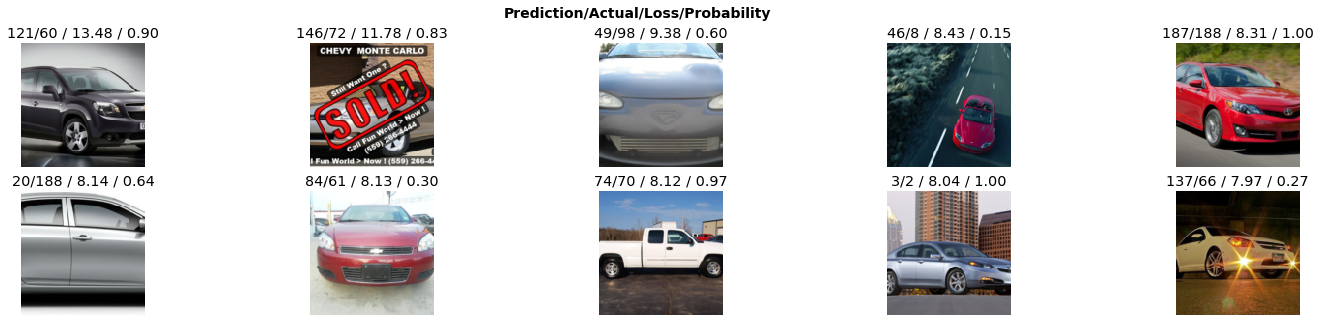

In [65]:
interp.plot_top_losses(10, nrows=2, figsize = (25,5))

In [15]:
# Creating dictionary mapping for class and labels 

In [8]:
from scipy.io import loadmat
import pandas as pd

In [9]:
mat_class = loadmat('./input2/devkit/cars_meta.mat')

In [10]:
annotations = mat_class['class_names']
annotations = np.transpose(annotations)


In [11]:
annotations

array([[array(['AM General Hummer SUV 2000'], dtype='<U26')],
       [array(['Acura RL Sedan 2012'], dtype='<U19')],
       [array(['Acura TL Sedan 2012'], dtype='<U19')],
       [array(['Acura TL Type-S 2008'], dtype='<U20')],
       [array(['Acura TSX Sedan 2012'], dtype='<U20')],
       [array(['Acura Integra Type R 2001'], dtype='<U25')],
       [array(['Acura ZDX Hatchback 2012'], dtype='<U24')],
       [array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40')],
       [array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34')],
       [array(['Aston Martin Virage Convertible 2012'], dtype='<U36')],
       [array(['Aston Martin Virage Coupe 2012'], dtype='<U30')],
       [array(['Audi RS 4 Convertible 2008'], dtype='<U26')],
       [array(['Audi A5 Coupe 2012'], dtype='<U18')],
       [array(['Audi TTS Coupe 2012'], dtype='<U19')],
       [array(['Audi R8 Coupe 2012'], dtype='<U18')],
       [array(['Audi V8 Sedan 1994'], dtype='<U18')],
       [array(['Audi 100 Sedan 1

In [12]:
annotations.shape

(196, 1)

In [13]:
# Please change the array positions for different stuff accordingly 
fnames = []
class_ids = []
bboxes = []
labels = []

for annotation in annotations:
    fname = annotation[0][0]
    fnames.append(fname)

In [14]:
fnames

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi A5 Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi V8 Sedan 1994',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi TT Hatchback 2011',
 'Audi S6 Sedan 2011',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S4 Sedan 2012',
 'Audi S4 Sedan 2007',
 'Audi TT RS Coupe 2012',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW X5 SUV 2007',
 'BMW X6 SUV 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3

In [15]:
findex = [i+1 for i in range(len(fnames))]

In [16]:
res = {findex[i]: fnames[i] for i in range(len(fnames))} 

In [17]:
res

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [18]:
learn_inf = load_learner(path/'export.pkl')


In [19]:
learn_inf.dls.vocab


(#196) [1,2,3,4,5,6,7,8,9,10...]

In [20]:
btn_run = widgets.Button(description='Classify')


In [21]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    #pred = res[pred-1]
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [22]:
btn_upload = widgets.FileUpload()


In [23]:
out_pl = widgets.Output()


In [24]:
lbl_pred = widgets.Label()


In [25]:
VBox([widgets.Label('Select a Car Image'),btn_upload, btn_run, out_pl, lbl_pred])


In [26]:
# Exporting model and other dependencies for deployment on AWS Lambda

In [33]:
def save_texts(fname, texts):
    "Save in `fname` the content of `texts`."
    with open(fname, 'w') as f:
        for t in texts: f.write(f'{t}\n')

In [57]:
# export model to TorchScript format
trace_input = torch.ones(1,3,299,299)
jit_model = torch.jit.trace(learn_inf.model.float(), trace_input)
model_file='car_make_model_ResNet_jit.pth'
output_path = str(path/f'models/{model_file}')
torch.jit.save(jit_model, output_path)
# export classes text file
save_texts(path/'models/classes.txt', fnames)
tar_file=path/'models/model.tar.gz'
classes_file='classes.txt'
# create a tarfile with the exported model and classes text file
with tarfile.open(tar_file, 'w:gz') as f:
    f.add(path/f'models/{model_file}', arcname=model_file)
    f.add(path/f'models/{classes_file}', arcname=classes_file)